In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = pd.read_csv('Preprocessed.csv')
data.head(10)

,Unnamed: 0,C3 Feed Rate,H2C3 Ratio,Reactor Pressure,Reactor Bed Level,C2 Flow Rate,Catalyst Feed Rate,Temperature,Melt Flow Rate (gm/10min)
0,0,0.626039,0.156122,0.605534,0.548468,0.427522,0.216268,0.191178,1.223775
1,1,0.674735,0.156122,0.625137,0.427020,0.338153,0.164036,0.079761,1.163151
2,2,0.685611,0.156122,0.595294,0.460480,0.370353,0.194934,0.076631,1.163151
3,3,0.643364,0.156122,0.689241,0.496188,0.346936,0.197283,0.091450,1.131402
4,4,0.625850,0.153061,0.651940,0.442636,0.319230,0.153123,0.092592,1.193922
5,5,0.662255,0.153061,0.609742,0.401205,0.237791,0.180520,0.094256,1.163151
6,6,0.682297,0.153061,0.606323,0.430902,0.341555,0.220660,0.130759,1.223775
7,7,0.780051,0.153061,0.621185,0.461491,0.375978,0.210956,0.118081,1.280934
8,8,0.801381,0.153061,0.568805,0.470063,0.413820,0.208673,0.054441,1.335001
9,9,0.752457,0.153061,0.568290,0.431514,0.348281,0.182163,0.050776,1.335001


In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
data

,C3 Feed Rate,H2C3 Ratio,Reactor Pressure,Reactor Bed Level,C2 Flow Rate,Catalyst Feed Rate,Temperature,Melt Flow Rate (gm/10min)
0,0.626039,0.156122,0.605534,0.548468,0.427522,0.216268,0.191178,1.223775
1,0.674735,0.156122,0.625137,0.427020,0.338153,0.164036,0.079761,1.163151
2,0.685611,0.156122,0.595294,0.460480,0.370353,0.194934,0.076631,1.163151
3,0.643364,0.156122,0.689241,0.496188,0.346936,0.197283,0.091450,1.131402
4,0.625850,0.153061,0.651940,0.442636,0.319230,0.153123,0.092592,1.193922
...,...,...,...,...,...,...,...,...
2479,0.381397,0.183673,0.761203,0.236022,0.041436,0.091166,0.120345,2.468100
2480,0.644066,0.183673,0.445135,0.219323,0.348075,0.166389,0.297213,2.415914
2481,0.282182,0.255102,0.718470,0.221668,0.222784,0.109987,0.217592,2.433613
2482,0.350380,0.188776,0.160333,0.317594,0.441366,0.175886,0.430668,2.602690


In [5]:
X = data.drop(['Melt Flow Rate (gm/10min)'],axis=1)
y = data['Melt Flow Rate (gm/10min)']
X.shape,y.shape

((2484, 7), (2484,))

### Simple Train Test Split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1987, 7), (497, 7), (1987,), (497,))

In [7]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
# Predict on test set
y_pred_lr = model_lr.predict(X_test)

In [8]:
r2 = r2_score(y_test, y_pred_lr)
print(r2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(rmse)

0.3652065001294499
0.5031535614332552


#### Visualizations

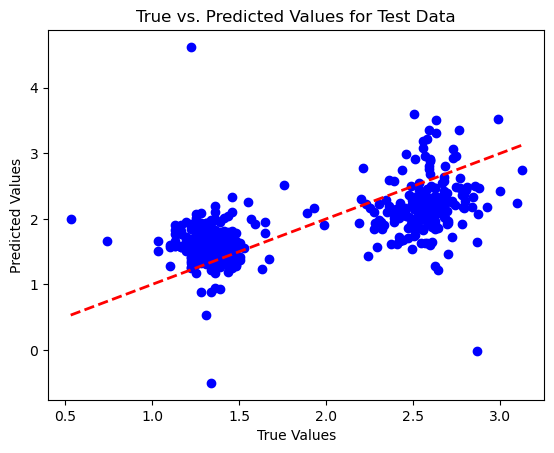

In [9]:
# plt.scatter(y_train, y_pred_train_lr, label='Train', color='green', marker='^')
plt.scatter(y_test, y_pred_lr, color='blue', marker='o')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values for Test Data')
plt.show()

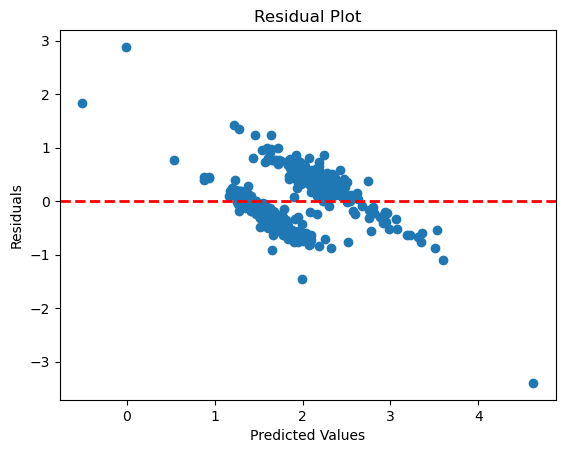

In [10]:
residuals = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## K-fold

In [11]:
from sklearn.model_selection import KFold

In [12]:
kf = KFold(n_splits=5)

r2_scores = []
rmse_scores = []

# Perform 5-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate R2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

# Print R2 scores and RMSE for each fold
for i in range(len(r2_scores)):
    print(f"Fold {i+1}: R2 score = {r2_scores[i]}, RMSE = {rmse_scores[i]}")

Fold 1: R2 score = 0.38525281019349555, RMSE = 0.485845729922875
Fold 2: R2 score = 0.38390276842639337, RMSE = 0.4328636550928331
Fold 3: R2 score = 0.21712075775655404, RMSE = 0.6052059181556025
Fold 4: R2 score = 0.1491903090672546, RMSE = 0.5195445463735691
Fold 5: R2 score = 0.1262507547641849, RMSE = 0.5811847357186019
